<p  style="text-align: center;"><font size="12"><b>WORLD HAPPINESS REPORT 2019</b></font></p>
<p  style="text-align: center;"><font size="4"><b>AN EXPLORATORY ANALYSIS</b></font></p>

![](https://github.com/miltonsuggs/08_world_happiness_eda/blob/main/happiness.jpg?raw=true)

## INTRODUCTION

The World Happiness Report is a survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. The 2019 World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.

An exploratory data analysis of the data will be performed in this notebook, with a predictive model to be built at a later date. 

## ABOUT THE DATA

The data includes the following variables:
* **Country**
* **Ladder:** measure of life satisfaction.
* **Standard Deviation of Ladder**
* **Positive affect:** Measure of positive emotion.
* **Negative affect:** Measure of negative emotion.
* **Social support:** The extent to which Social support contributed to the calculation of the Happiness Score.
* **Freedom:** The extent to which Freedom contributed to the calculation of the Happiness Score.
* **Corruption:** The extent to which Perception of Corruption contributes to Happiness Score.
* **Generosity:** The extent to which Generosity contributed to the calculation of the Happiness Score.
* **Log of GDP (number per capita):** The extent to which GDP contributes to the calculation of the Happiness Score.
* **Healthy life expectancy:** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

The data is not ideal for predictive analysis because instead of providing an actual measurement for each of the variables, it provides a ranking based on the measurements. 

<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Table of Contents</h3>

* <a href='#1'>I. INSTALL LIBRARIES & PACKAGES</a>
* <a href='#2'>II. DATA OVERVIEW & INSIGHTS</a>
* <a href='#3'>III. MISSING VALUES</a>
* <a href='#1'>I. INSTALL LIBRARIES & PACKAGES</a>
* <a href='#1'>I. INSTALL LIBRARIES & PACKAGES</a>

2. [Feature Engineering part 1](#preprocessing1)
3. [Initial Insights](#insights)
4. [Data Exploration & Visualization](#eda)  
    A. [Univariate Exploration](#univariate)   
      I. [Categorical Variables](#cat1)  
      II. [Continuous Variables](#cont1)      
    B. [Bivariate Exploration](#biivariate)  
      I. [Categorical Variables](#cat2)  
      II. [Continuous Variables](#cont2)   
    C. [Multivariate Exploration](#multivariate) 
5. [Data Normalization](#norm) (coming soon) 
6. [Model Development](#modeling)  (coming soon)

# <a id='1'>I. LIBRARIES AND PACKAGES</a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2019/world-happiness-report-2019.csv


# <a id='2'>II. DATA OVERVIEW & INSIGHTS</a>

In [2]:
df = pd.read_csv('../input/world-happiness-report-2019/world-happiness-report-2019.csv')
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [3]:
df.columns

Index(['Country (region)', 'Ladder', 'SD of Ladder', 'Positive affect',
       'Negative affect', 'Social support', 'Freedom', 'Corruption',
       'Generosity', 'Log of GDP\nper capita', 'Healthy life\nexpectancy'],
      dtype='object')

In [4]:
df.rename(columns={'Country (region)':'country',
                   'Ladder':'ladder', 'SD of Ladder':'ladder_sd',
                   'Positive affect':'positive_affect','Negative affect':'negative_affect',
                   'Social support':'social_support', 'Freedom':'freedom', 
                   'Corruption':'corruption','Generosity':'generosity',
                   'Log of GDP\nper capita':'gdp_log', 
                   'Healthy life\nexpectancy':'life_expectancy'}, inplace=True)

In [5]:
df.head()

,country,ladder,ladder_sd,positive_affect,negative_affect,social_support,freedom,corruption,generosity,gdp_log,life_expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          156 non-null    object 
 1   ladder           156 non-null    int64  
 2   ladder_sd        156 non-null    int64  
 3   positive_affect  155 non-null    float64
 4   negative_affect  155 non-null    float64
 5   social_support   155 non-null    float64
 6   freedom          155 non-null    float64
 7   corruption       148 non-null    float64
 8   generosity       155 non-null    float64
 9   gdp_log          152 non-null    float64
 10  life_expectancy  150 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [7]:
df.describe()

,ladder,ladder_sd,positive_affect,negative_affect,social_support,freedom,corruption,generosity,gdp_log,life_expectancy
count,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000
mean,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
std,45.177428,45.177428,44.888751,44.888751,44.888751,44.888751,42.868014,44.888751,44.022721,43.445368
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,39.750000,39.750000,39.500000,39.500000,39.500000,39.500000,37.750000,39.500000,38.750000,38.250000
50%,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
75%,117.250000,117.250000,116.500000,116.500000,116.500000,116.500000,111.250000,116.500000,114.250000,112.750000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


# <a id='3'>III. MISSING VALUES</a>

In [8]:
missing_sum = df.isnull().sum().sort_values()
missing_sum

country            0
ladder             0
ladder_sd          0
positive_affect    1
negative_affect    1
social_support     1
freedom            1
generosity         1
gdp_log            4
life_expectancy    6
corruption         8
dtype: int64

In [9]:
df['positive_affect'].fillna(df['positive_affect'].mean(),inplace=True)
df['negative_affect'].fillna(df['negative_affect'].mean(),inplace=True)
df['social_support'].fillna(df['social_support'].mode(),inplace=True)
df['freedom'].fillna(df['freedom'].median(),inplace=True)
df['corruption'].fillna(df['corruption'].mean(),inplace=True)
df['generosity'].fillna(df['generosity'].median(),inplace=True)
df['gdp_log'].fillna(df['gdp_log'].mean(),inplace=True)
df['life_expectancy'].fillna(df['life_expectancy'].mean(),inplace=True)

# <a id='4'>IV. FEATURE ENGINEERING</a>

In [10]:
asia = ["Israel", "United Arab Emirates", "Singapore", "Thailand", "Taiwan Province of China",
                 "Qatar", "Saudi Arabia", "Kuwait", "Bahrain", "Malaysia", "Uzbekistan", "Japan",
                 "South Korea", "Turkmenistan", "Kazakhstan", "Turkey", "Hong Kong S.A.R., China", "Philippines",
                 "Jordan", "China", "Pakistan", "Indonesia", "Azerbaijan", "Lebanon", "Vietnam",
                 "Tajikistan", "Bhutan", "Kyrgyzstan", "Nepal", "Mongolia", "Palestinian Territories",
                 "Iran", "Bangladesh", "Myanmar", "Iraq", "Sri Lanka", "Armenia", "India", "Georgia",
                 "Cambodia", "Afghanistan", "Yemen", "Syria"]

europe = ["Norway", "Denmark", "Iceland", "Switzerland", "Finland",
                 "Netherlands", "Sweden", "Austria", "Ireland", "Germany",
                 "Belgium", "Luxembourg", "United Kingdom", "Czech Republic",
                 "Malta", "France", "Spain", "Slovakia", "Poland", "Italy",
                 "Russia", "Lithuania", "Latvia", "Moldova", "Romania",
                 "Slovenia", "North Cyprus", "Cyprus", "Estonia", "Belarus",
                 "Serbia", "Hungary", "Croatia", "Kosovo", "Montenegro",
                 "Greece", "Portugal", "Bosnia and Herzegovina", "Macedonia",
                 "Bulgaria", "Albania", "Ukraine"]

north_america = ["Canada", "Costa Rica", "United States", "Mexico",  
                 "Panama","Trinidad and Tobago", "El Salvador", "Belize", "Guatemala",
                 "Jamaica", "Nicaragua", "Dominican Republic", "Honduras",
                 "Haiti"]

south_america = ["Chile", "Brazil", "Argentina", "Uruguay",
                 "Colombia", "Ecuador", "Bolivia", "Peru",
                 "Paraguay", "Venezuela"]

australia = ["New Zealand", "Australia"]

df['continent'] = np.nan 

# FILL IN CONTINENTS BASED ON COUNTRIES
df.loc[(df['country'].isin(asia)), 'continent'] = 'Asia'
df.loc[(df['country'].isin(europe)), 'continent'] = 'Europe'
df.loc[(df['country'].isin(north_america)), 'continent'] = 'North America'
df.loc[(df['country'].isin(south_america)), 'continent'] = 'South America'
df.loc[(df['country'].isin(australia)), 'continent'] = 'Australia'
df.continent.fillna("Africa", inplace=True)

# REORDER COLUMNS
cols = ['continent', 'country', 'ladder', 'ladder_sd', 'positive_affect', 'negative_affect',
       'social_support', 'freedom', 'corruption', 'generosity', 'gdp_log',
       'life_expectancy']

df = df[cols]

In [11]:
df.head()

,continent,country,ladder,ladder_sd,positive_affect,negative_affect,social_support,freedom,corruption,generosity,gdp_log,life_expectancy
0,Europe,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Europe,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Europe,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Europe,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Europe,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


# <a id='5'>V. EXPLORATORY DATA ANALYSIS</a>

### CORRELATION MATRIX

Text(0.5, 1.0, 'VARIABLE CORRELATION MATRIX')

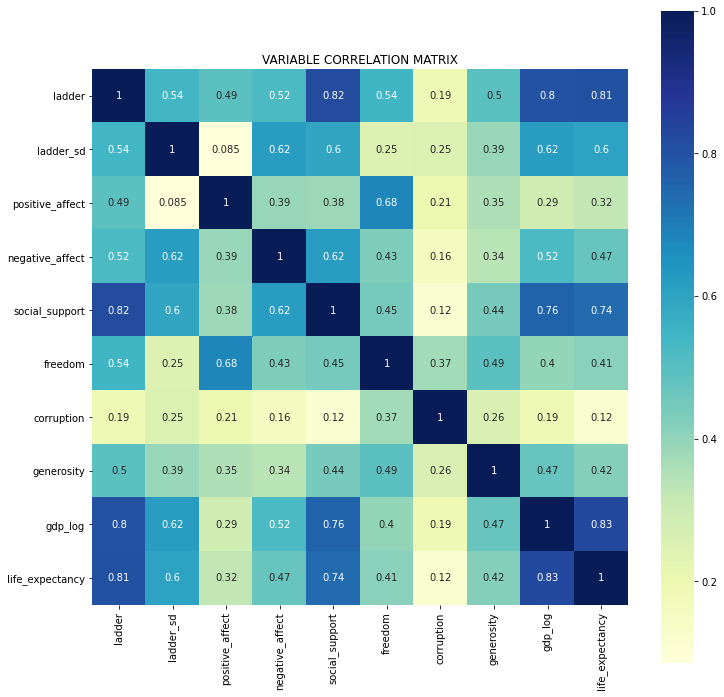

In [12]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cbar = True,  square = True, annot=True, cmap= 'YlGnBu')
plt.title('VARIABLE CORRELATION MATRIX')

## TOP 10 ANALYSIS

Let's see how each country ranks according to each of the variables in the dataset. 

In [60]:
top_10_ladder = df[['country','ladder']].sort_values(by='ladder', ascending=True)[:10]
bottom_10_ladder = df[['country','ladder']].sort_values(by='ladder', ascending=False)[:10]

fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "xy"}]],
                    subplot_titles=('Top 10', 'Bottom 10'))

fig.add_trace(go.Bar(x=top_10_ladder['country'], 
                     y=top_10_ladder['ladder'], 
                     name='Top 10 Ladder'), row=1, col=1)


fig.add_trace(go.Bar(x=bottom_10_ladder['country'], 
                     y=bottom_10_ladder['ladder'], 
                     name='Bottom 10 Ladder'),row=1, col=2)

fig.update_layout(height=500, 
                  width=1000,
                  title_text=("TOP & BOTTOM 10 COUTRIES LIFE SATISFACTION RANKING"),
                  bargap=0.2, 
                  bargroupgap=0.1,
                  yaxis={'categoryorder':'total descending'}
                 )
fig.show()

In [68]:
top_10_pa = df[['country','positive_affect']].sort_values(by='positive_affect', ascending=True)[:10]
bottom_10_pa = df[['country','positive_affect']].sort_values(by='positive_affect', ascending=False)[:10]

fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "xy"}]],
                    subplot_titles=('Top 10', 'Bottom 10'))

fig.add_trace(go.Bar(x=top_10_pa['country'], 
                     y=top_10_pa['positive_affect'], 
                     name='Top 10 Positive Affect'), row=1, col=1)

fig.add_trace(go.Bar(x=bottom_10_pa['country'], 
                     y=bottom_10_pa['positive_affect'], 
                     name='Bottom 10 Positive Affect'), row=1, col=2)

fig.update_layout(height=500, 
                  width=1000,
                  title_text=("TOP & BOTTOM 10 COUTRIES POSITIVE AFFECT RANKING"),
                  bargap=0.2, 
                  bargroupgap=0.1,
                  yaxis={'categoryorder':'total descending'}
                 )
fig.show()

In [70]:
top_10_na = df[['country','negative_affect']].sort_values(by='negative_affect', ascending=True)[:10]
bottom_10_na = df[['country','negative_affect']].sort_values(by='negative_affect', ascending=False)[:10]

fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "xy"}]],
                    subplot_titles=('Top 10', 'Bottom 10'))

fig.add_trace(go.Bar(x=top_10_na['country'], 
                     y=top_10_na['negative_affect'], 
                     name='Top 10 Negative Affect'), row=1, col=1)

fig.add_trace(go.Bar(x=bottom_10_na['country'], 
                     y=bottom_10_na['negative_affect'], 
                     name='Bottom 10 Negative Affect'), row=1, col=2)

fig.update_layout(height=500, 
                  width=1000,
                  title_text=("TOP & BOTTOM 10 COUTRIES NEGATIVE AFFECT RANKING"),
                  bargap=0.2, 
                  bargroupgap=0.1,
                  yaxis={'categoryorder':'total descending'}
                 )
fig.show()

In [71]:
top_10_ss = df[['country','social_support']].sort_values(by='social_support', ascending=True)[:10]
bottom_10_ss = df[['country','social_support']].sort_values(by='social_support', ascending=False)[:10]

fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "xy"}]],
                    subplot_titles=('Top 10', 'Bottom 10'))

fig.add_trace(go.Bar(x=top_10_ss['country'], 
                     y=top_10_ss['social_support'], 
                     name='Top 10 Social Support'), row=1, col=1)

fig.add_trace(go.Bar(x=bottom_10_ss['country'], 
                     y=bottom_10_ss['social_support'], 
                     name='Bottom 10 Social Support'), row=1, col=2)

fig.update_layout(height=500, 
                  width=1000,
                  title_text=("TOP & BOTTOM 10 COUTRIES SOCIAL SUPPORT RANKING"),
                  bargap=0.2, 
                  bargroupgap=0.1,
                  yaxis={'categoryorder':'total descending'}
                 )
fig.show()

In [72]:
top_10_free = df[['country','freedom']].sort_values(by='freedom', ascending=True)[:10]
bottom_10_free = df[['country','freedom']].sort_values(by='freedom', ascending=False)[:10]

fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "xy"}]],
                    subplot_titles=('Top 10', 'Bottom 10'))

fig.add_trace(go.Bar(x=top_10_free['country'], 
                     y=top_10_free['freedom'], 
                     name='Top 10 Freedom'), row=1, col=1)

fig.add_trace(go.Bar(x=bottom_10_free['country'], 
                     y=bottom_10_free['freedom'], 
                     name='Bottom 10 Freedom'), row=1, col=2)

fig.update_layout(height=500, 
                  width=1000,
                  title_text=("TOP & BOTTOM 10 COUTRIES FREEDOM RANKING"),
                  bargap=0.2, 
                  bargroupgap=0.1,
                  yaxis={'categoryorder':'total descending'}
                 )
fig.show()

In [82]:
top_10_corruption = df[['country','corruption']].sort_values(by='corruption', ascending=True)[:10]
bottom_10_corruption = df[['country','corruption']].sort_values(by='corruption', ascending=False)[:10]

fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "xy"}]],
                    subplot_titles=('10 Highest Corruption Ranking', '10 Lowest Corruption Ranking'))

fig.add_trace(go.Bar(x=top_10_corruption['country'], 
                     y=top_10_corruption['corruption'], 
                     name='10 Highest Corruption'), row=1, col=1)

fig.add_trace(go.Bar(x=bottom_10_corruption['country'], 
                     y=bottom_10_corruption['corruption'], 
                     name='10 Lowest Corruption'), row=1, col=2)

fig.update_layout(height=500, 
                  width=1000,
                  title_text=("TOP & BOTTOM 10 COUTRIES CORRUPTION RANKING"),
                  bargap=0.2, 
                  bargroupgap=0.1,
                  yaxis={'categoryorder':'total descending'}
                 )
fig.show()

In [83]:
top_10_generosity = df[['country','generosity']].sort_values(by='generosity', ascending=True)[:10]
bottom_10_generosity = df[['country','generosity']].sort_values(by='generosity', ascending=True)[:10]

fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "xy"}]],
                    subplot_titles=('Top 10 Generosity', 'Bottom 10 Generosity'))

fig.add_trace(go.Bar(x=top_10_generosity['country'], 
                     y=top_10_generosity['generosity'], 
                     name='Top 10 Generosity'), row=1, col=1)

fig.add_trace(go.Bar(x=bottom_10_generosity['country'], 
                     y=bottom_10_generosity['generosity'], 
                     name='Bottom 10 Generosity'), row=1, col=2)

fig.update_layout(height=500, 
                  width=1000,
                  title_text=("TOP & BOTTOM 10 COUTRIES GENEROSITY RANKING"),
                  bargap=0.2, 
                  bargroupgap=0.1,
                  yaxis={'categoryorder':'total descending'}
                 )
fig.show()

In [79]:
top_10_le = df[['country','life_expectancy']].sort_values(by='life_expectancy', ascending=True)[:10]
bottom_10_le = df[['country','life_expectancy']].sort_values(by='life_expectancy', ascending=False)[:10]

fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "xy"}]],
                    subplot_titles=('Top 10 Life Expectancy', 'Bottom 10 Life Expectancy'))

fig.add_trace(go.Bar(x=top_10_le['country'], 
                     y=top_10_le['life_expectancy'], 
                     name='10 Highest Life Expectancy Ranking'), row=1, col=1)

fig.add_trace(go.Bar(x=bottom_10_le['country'], 
                     y=bottom_10_le['life_expectancy'], 
                     name='10 Lowest Life Expectancy Ranking'), row=1, col=2)

fig.update_layout(height=500, 
                  width=1000,
                  title_text=("TOP & BOTTOM 10 COUTRIES LIFE EXPECTANCY RANKING"),
                  bargap=0.2, 
                  bargroupgap=0.1,
                  yaxis={'categoryorder':'total descending'}
                 )
fig.show()

### VISUALIZING CORRELATIONS

Using scatter plots we're able to visualize how certain variables are correlated. There is an obvious positive correlation between several pairs of variables, while others no correlation is evident. This is consistent with the correlation heatmap presented above. 

In [21]:
fig = px.scatter(df, x="ladder", y="positive_affect")

fig.update_layout(height=500, 
                  width=800, 
                  title_text='POSITIVE AFFECT vs LADDER'
                 )
fig.show()

In [22]:
fig = px.scatter(df, x="positive_affect", y="freedom")

fig.update_layout(height=500, 
                  width=800, 
                  title_text='POSITIVE AFFECT vs FREEDOM'
                 )
fig.show()

In [23]:
fig = px.scatter(df, x="ladder", y="social_support")

fig.update_layout(height=500, 
                  width=800, 
                  title_text='LADDER vs SOCIAL SUPPORT'
                 )
fig.show()

In [24]:
fig = px.scatter(df, x="ladder", y="corruption")

fig.update_layout(height=500, 
                  width=800, 
                  title_text='LADDER vs CORRUPTION'
                 )
fig.show()

In [25]:
fig = px.scatter(df, x="ladder", y="gdp_log")

fig.update_layout(height=500, 
                  width=800, 
                  title_text='LADDER vs GDP LOG'
                 )
fig.show()

In [26]:
fig = px.scatter(df, x="ladder", y="life_expectancy")

fig.update_layout(height=500, 
                  width=800, 
                  title_text='LIFE EXPECTANCY vs LADDER'
                 )
fig.show()

In [27]:
fig = px.scatter(df, x="life_expectancy", y="social_support")

fig.update_layout(height=500, 
                  width=800, 
                  title_text='LIFE EXPECTANCY vs SOCIAL SUPPORT'
                 )
fig.show()

In [28]:
fig = px.scatter(df, x="life_expectancy", y="gdp_log")

fig.update_layout(height=500, 
                  width=800, 
                  title_text='LIFE EXPECTANCY vs GDP LOG'
                 )
fig.show()

### CONTINENT ANALYSIS

In [29]:
df_cont_le = df.groupby(['continent'])[['life_expectancy']].mean()
df_cont_le.reset_index(inplace=True)
df_cont_le.sort_values(by='life_expectancy', ascending=False, inplace=True)

fig = go.FigureWidget(data=[go.Bar(x=df_cont_le['life_expectancy'], y=df_cont_le['continent'], orientation='h',
                                   marker={'color': df_cont_le['life_expectancy'], 'colorscale': 'Viridis'})]) 

fig.update_layout(height=500, width=800, 
                  title_text='AVERAGE LIFE EXPECTANCY BY CONTINENT')
fig.show()

In [30]:
df_cont_le = df.groupby(['continent'])[['positive_affect']].mean()
df_cont_le.reset_index(inplace=True)
df_cont_le.sort_values(by='positive_affect', ascending=False, inplace=True)

fig = go.FigureWidget(data=[go.Bar(x=df_cont_le['positive_affect'], y=df_cont_le['continent'], orientation='h',
                                   marker={'color': df_cont_le['positive_affect'], 'colorscale': 'Viridis'})]) 

fig.update_layout(height=500, width=800, 
                  title_text='AVERAGE POSITIVE AFFECT BY CONTINENT')
fig.show()

In [31]:
df_cont_le = df.groupby(['continent'])[['negative_affect']].mean()
df_cont_le.reset_index(inplace=True)
df_cont_le.sort_values(by='negative_affect', ascending=False, inplace=True)

fig = go.FigureWidget(data=[go.Bar(x=df_cont_le['negative_affect'], y=df_cont_le['continent'], orientation='h',
                                   marker={'color': df_cont_le['negative_affect'], 'colorscale': 'Viridis'})]) 

fig.update_layout(height=500, width=800, 
                  title_text='AVERAGE NEGATIVE AFFECT BY CONTINENT')
fig.show()